# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Sentiment Analysis and Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


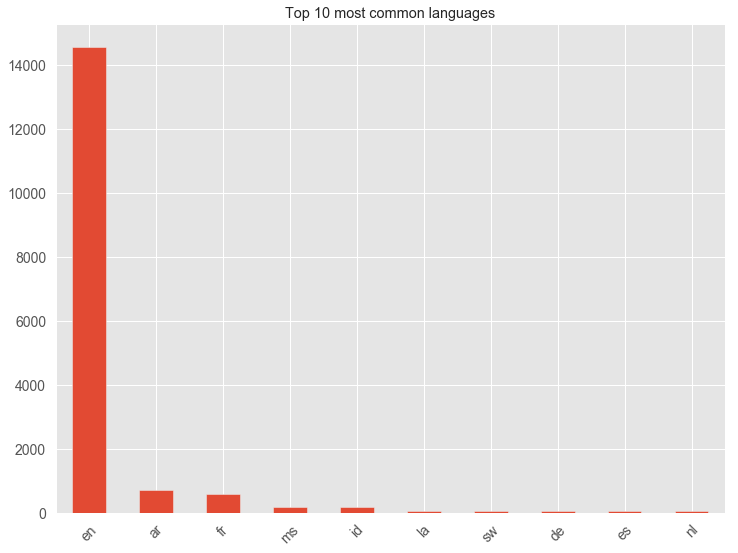

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
%run ./cleaning_18052019.ipynb

In [3]:
from textblob import TextBlob
def get_polarity(s):
     return TextBlob(s).sentiment.polarity
    
def get_subjectivity(s):
    return TextBlob(s).sentiment.subjectivity

# Unedited tweets  --- results are the same when using preprocessed tweets.
df['polarity'] = df['tweets_unedit'].apply(get_polarity)
df['subjectivity'] = df['tweets_unedit'].apply(get_subjectivity)

In [4]:
sub = df[['polarity','subjectivity','date']].groupby(['date']).mean().reset_index()
sub.set_index('date', inplace = True)

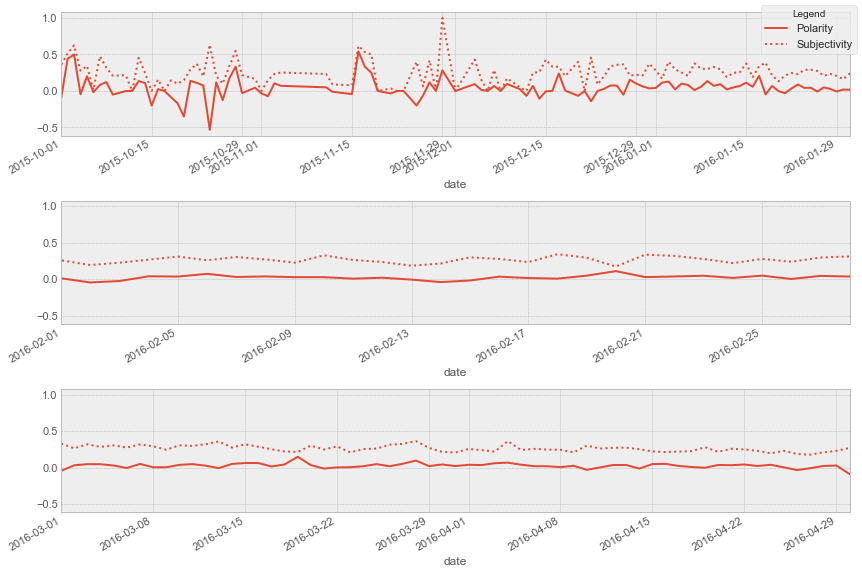

In [19]:
fig = plot_periods(sub['polarity'],sub['subjectivity'])
fig.legend(labels=["Polarity", "Subjectivity"], loc = "upper right", title="Legend")
plt.savefig('figures_exam_project/polarity_subjectivity_timestamp.png')


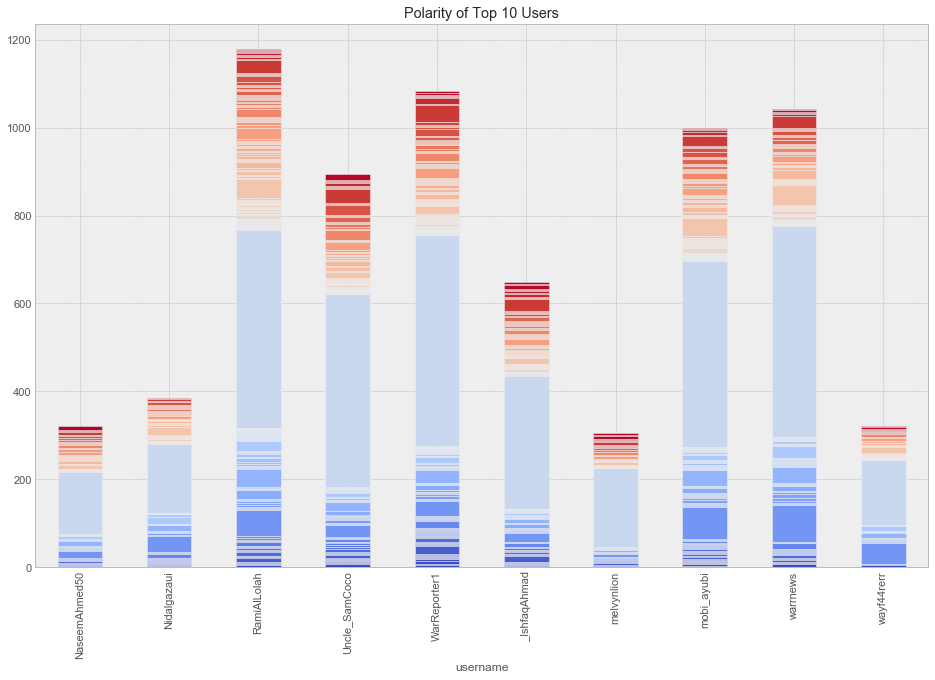

In [22]:
# Sentiments by top 10 users
# Define Top 10 users
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]

# Make graph
pd.crosstab(top10_users.username, top10_users.polarity).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")
plt.legend().set_visible(False)
plt.title("Polarity of Top 10 Users")
plt.savefig('figures_exam_project/polarity_top10.png')

# Text classification

In [7]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

def our_tokenizer(text):
    return text

vec = TfidfVectorizer(tokenizer=our_tokenizer, ngram_range=(1,2), max_df=.5, lowercase=False)
X = vec.fit_transform(df.tweets_lemm.tolist())

terms = vec.get_feature_names()

nmf = NMF(n_components=10).fit(X)
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("")

Topic #0:
kill soldier soldier kill militant claim kill soldier clash injure attack iraqi soldier

Topic #1:
state islamic islamic state fighter state fighter force state force capture fighting via

Topic #2:
isis us assad rebel syrian attack say fight syria muslim

Topic #3:
lol like lol look look know yeah lol yeah lol guess lol seriously lol dying

Topic #4:
army near destroy tank attack target report iraqi position force

Topic #5:
al abu qaeda al qaeda nusra al nusra jabhat sham jabhat al islam

Topic #6:
city work east east city center photo city night center city western west city

Topic #7:
allah may may allah one accept brother allah accept protect allah protect muslim

Topic #8:
ameen inshaallah ameen inshaallah ameen allahuma allahuma ameen allahuma ameen u u also may shaheed

Topic #9:
today airstrikes civilian kill child civilian kill kill today one coalition wounded



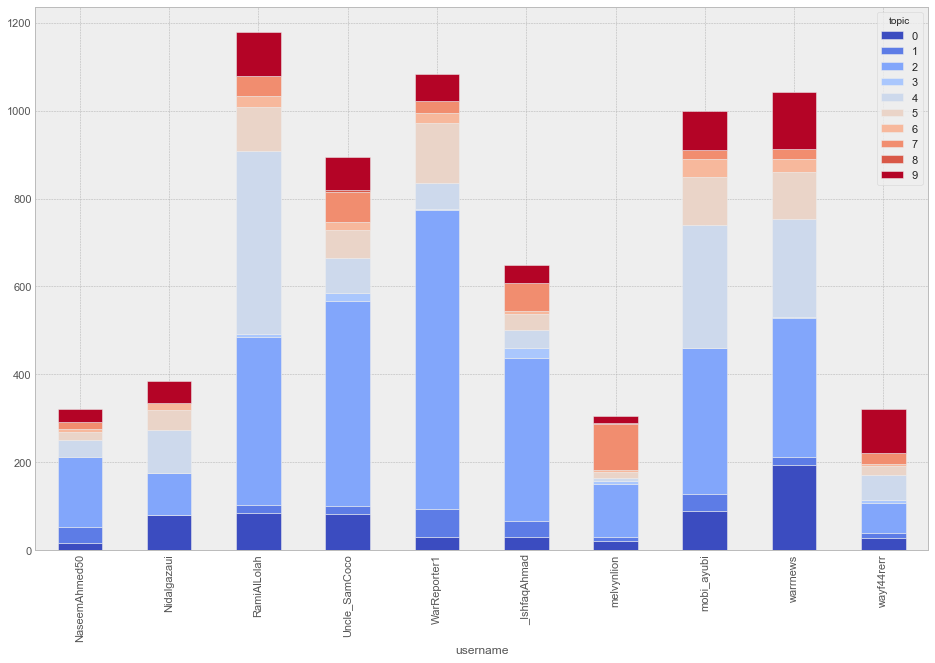

In [8]:
style.use('bmh')

df['topic'] = np.argmax(nmf.transform(vec.transform(df.tweets_lemm.tolist())), axis=1)
top10_users = df[df.username.isin(df.username.value_counts()[:10].keys().tolist())]
pd.crosstab(top10_users.username, top10_users.topic).plot.bar(stacked=True, figsize=(16, 10), colormap="coolwarm")

# LDA

In [23]:
# Build the bigram and trigram models
import gensim
data_words = df.tweets_lemm.tolist()
bigram = gensim.models.phrases.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.phrases.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[0]])

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packag

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser clas

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['sheikh', 'nasir', 'al', 'wuhayshi', 'ha', 'leader', 'aqap', 'promise', 'victory']


In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

data_words_bigrams

[['sheikh',
  'nasir',
  'al',
  'wuhayshi',
  'ha',
  'leader',
  'aqap',
  'promise',
  'victory'],
 ['aqap',
  'response',
  'sheikh',
  'baghdadis',
  'statement',
  'although',
  'disbeliever',
  'dislike'],
 ['oh', 'murabit'],
 ['collection', 'words', 'u', 'lama', 'regard', 'dawlah'],
 ['aslm', 'please', 'share', 'new', 'account', 'previous', 'one', 'suspend'],
 ['aqap', 'statement', 'regard', 'bless', 'raid', 'france'],
 [],
 ['translate', 'either'],
 ['aslm',
  'anybody',
  'translate',
  'new',
  'jn',
  'video',
  'translate',
  'nobody',
  'else'],
 ['translate', 'inshallah', 'let', 'us', 'knw', 'anybody', 'available', 'sub'],
 ['half', 'way', 'days', 'inshallah', 'busy'],
 ['aslm', 'complete', 'translation', 'exception', 'news'],
 ['report', 'words', 'syrian', 'people', 'complete', 'tomorrow'],
 ['inshallah', 'still', 'finish'],
 ['new', 'links', 'video', 'eng', 'sub', 'path', 'salvation', 'watch'],
 ['video', 'eng', 'subtitle', 'save', 'aleppo', 'watch', 'download'],
 ['pa

In [25]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [27]:
# Build LDA model
# Note: here I take 20 topics, it says that generally we should play around with different number of topics and see which has the best fit
# Please note: this takes long
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [28]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"us" + 0.012*"allah" + 0.010*"say" + 0.010*"people" + 0.008*"syria" + '
  '0.008*"rebel" + 0.008*"pig" + 0.008*"make" + 0.008*"like" + 0.007*"group"'),
 (1,
  '0.033*"isis" + 0.020*"state" + 0.019*"islamic" + 0.012*"take" + '
  '0.011*"control" + 0.009*"video" + 0.009*"muslim" + 0.009*"fight" + '
  '0.009*"one" + 0.008*"new"'),
 (2,
  '0.028*"kill" + 0.026*"al" + 0.016*"army" + 0.015*"soldier" + 0.014*"force" '
  '+ 0.013*"near" + 0.012*"city" + 0.012*"iraqi" + 0.011*"fighter" + '
  '0.010*"attack"')]


In [30]:
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.402021312926468

Coherence Score:  0.2696597198843889


In [31]:
import pyLDAvis
import pyLDAvis.gensim 
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.318911 -0.007547       1        1  40.906582
0      0.167304 -0.226221       2        1  31.922897
1      0.151607  0.233768       3        1  27.170519, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
395   Default  1081.000000       isis  1081.000000  30.0000  30.0000
216   Default  1417.000000       kill  1417.000000  29.0000  29.0000
0     Default  1287.000000         al  1287.000000  28.0000  28.0000
97    Default   652.000000      state   652.000000  27.0000  27.0000
71    Default   639.000000    islamic   639.000000  26.0000  26.0000
46    Default   690.000000         us   690.000000  25.0000  25.0000
192   Default   777.000000       army   777.000000  24.0000  24.0000
210   Default   734.000000    soldier   734.000000  23.0000  23.0000
716   Default   711.000000      force   711.000000  22.0000  22.0000
1122  Default   634.000000       near   634.000000  21.0000  21.0000
556   Default   470.000000      allah   470.000000  20.0000  20.0000
194   Default   595.000000       city   595.000000  19.0000  19.0000
422   Default   576.000000      iraqi   576.000000  18.0000  18.0000
98    Default   383.000000       take   383.000000  17.0000  17.0000
149   Default   538.000000    fighter   538.000000  16.0000  16.0000
87    Default   363.000000    control   363.000000  15.0000  15.0000
138   Default   398.000000        say   398.000000  14.0000  14.0000
228   Default   508.000000     attack   508.000000  13.0000  13.0000
55    Default   390.000000     people   390.000000  12.0000  12.0000
301   Default   489.000000       area   489.000000  11.0000  11.0000
40    Default   308.000000      video   308.000000  10.0000  10.0000
222   Default   296.000000     muslim   296.000000   9.0000   9.0000
269   Default   289.000000      fight   289.000000   8.0000   8.0000
394   Default   424.000000    destroy   424.000000   7.0000   7.0000
26    Default   282.000000        one   282.000000   6.0000   6.0000
233   Default   414.000000      today   414.000000   5.0000   5.0000
518   Default   321.000000      syria   321.000000   4.0000   4.0000
389   Default   310.000000      rebel   310.000000   3.0000   3.0000
362   Default   308.000000        pig   308.000000   2.0000   2.0000
124   Default   300.000000       make   300.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
40     Topic3   308.223480      video   308.965942   1.3006  -4.6740
222    Topic3   296.031342     muslim   296.753296   1.3006  -4.7143
26     Topic3   282.158569        one   282.874084   1.3005  -4.7623
269    Topic3   288.772705      fight   289.528809   1.3004  -4.7392
25     Topic3   252.569931        new   253.299362   1.3002  -4.8731
400    Topic3   210.480637       iraq   211.235336   1.2995  -5.0554
1318   Topic3   203.128754      saudi   203.866165   1.2994  -5.0910
345    Topic3   196.716049       show   197.486832   1.2991  -5.1231
629    Topic3   176.109772     medium   176.809311   1.2991  -5.2337
1690   Topic3   177.360596        ypg   178.108337   1.2988  -5.2266
305    Topic3   170.225647        day   170.952591   1.2988  -5.2677
1637   Topic3   184.004105        pro   184.809509   1.2987  -5.1899
477    Topic3   164.589890       time   165.326706   1.2986  -5.3014
536    Topic3   158.390442  terrorist   159.114426   1.2985  -5.3397
447    Topic3   156.645935     turkey   157.369217   1.2984  -5.3508
1100   Topic3   159.638214       shia   160.395035   1.2983  -5.3319
1032   Topic3   155.494247      right   156.255875   1.2982  -5.3582
1306   Topic3   154.215439        map   154.996597   1.2980  -5.3665
1727   Topic3   135.813004  supporter   136.541733   1.2977  -5.4935
217    Topic3   128.644135      sunni   129.344604   1.2976  -5.5478
397    Topic3   217.515823    

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)